# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [5]:
iris_dataset_1 = iris_dataset['data'][:,[0,2,3]]
iris_dataset_2 = iris_dataset['data'][:,[1,2,3]]

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [6]:
# если работаете в интерактивной оболочке IPython 
#% matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

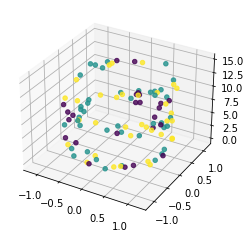

In [7]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)
plt.show()

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

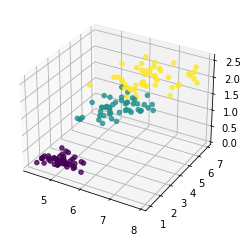

In [8]:
ax = plt.axes(projection='3d')

ax.scatter3D(iris_dataset_1[:,0], iris_dataset_1[:,1],\
             iris_dataset_1[:,2], alpha=.8, c=iris_dataset.target)

plt.show()

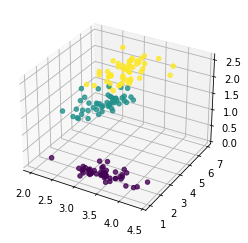

In [9]:
ax = plt.axes(projection='3d')

ax.scatter3D(iris_dataset_2[:,0], iris_dataset_2[:,1],\
             iris_dataset_2[:,2], alpha=.8, c=iris_dataset.target)
plt.show()

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1,\
                                                            iris_dataset['target'],\
                                                      test_size=0.2, random_state=17)


x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'],\
                                                      test_size=0.2, random_state=17)


#-----------------train------------------------
model_1 = KNeighborsClassifier(n_neighbors = 5)
knn_1 = model_1.fit(x_train_1,y_train_1)
knn_1_prediction = knn_1.predict(x_test_1)





model_2 = KNeighborsClassifier(n_neighbors = 5)
knn_2 = model_2.fit(x_train_2,y_train_2)
knn_2_prediction = knn_2.predict(x_test_2)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_1 = accuracy_score(y_test_1, knn_1_prediction)
accuracy_2 = accuracy_score(y_test_2, knn_2_prediction)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9666666666666667


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [14]:
for i in list(range(1,21)):
    model = KNeighborsClassifier(n_neighbors = i)
    knn = model.fit(x_train_1, y_train_1)
    pred = knn.predict(x_test_1)
    accuracy = accuracy_score(pred, y_test_1)
    print('neighbors %d' %i, 'accuracy %f'% accuracy)

neighbors 1 accuracy 0.966667
neighbors 2 accuracy 0.966667
neighbors 3 accuracy 0.966667
neighbors 4 accuracy 0.933333
neighbors 5 accuracy 0.966667
neighbors 6 accuracy 0.933333
neighbors 7 accuracy 0.933333
neighbors 8 accuracy 0.900000
neighbors 9 accuracy 0.933333
neighbors 10 accuracy 0.933333
neighbors 11 accuracy 0.966667
neighbors 12 accuracy 0.900000
neighbors 13 accuracy 0.933333
neighbors 14 accuracy 0.900000
neighbors 15 accuracy 0.966667
neighbors 16 accuracy 0.933333
neighbors 17 accuracy 0.933333
neighbors 18 accuracy 0.900000
neighbors 19 accuracy 0.900000
neighbors 20 accuracy 0.900000
